In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import math

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual
from ipywidgets import FloatSlider

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("data/tracks.csv", index_col=0)
pitch_df = pd.read_csv("data/pitch_covariance.csv", index_col=0)
timbre_df = pd.read_csv("data/timbre_covariance.csv", index_col=0)

<IPython.core.display.Javascript object>

In [5]:
df.head(2)

,id,artist,title,album,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_ids,type,genres
0,4Oun2ylbjFKMPTiaSbbCih,Cardi B,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),92,0.935,0.454,1,-7.509,1,...,0.0194,0.000000,0.0824,0.357,133.073,187541,4,"4kYSro6naA4h99UJvo89HB, 181bsRPaVXVlUKXrxwZfHK",track,"pop, pop rap, rap, houston rap, trap queen"
1,2SAqBLGA283SUiwJ3xOUVI,Drake,Laugh Now Cry Later (feat. Lil Durk),Laugh Now Cry Later (feat. Lil Durk),83,0.761,0.518,0,-8.871,1,...,0.2440,0.000035,0.1070,0.522,133.976,261493,4,"3TVXtAsR1Inumwj472S9r4, 3hcs9uc56yIGFCSy9leWe7",track,"canadian hip hop, canadian pop, hip hop, pop r..."


<IPython.core.display.Javascript object>

In [65]:
pitches = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
pitch_map = dict(enumerate(pitches))
df["key"] = df["key"].replace(pitch_map)

<IPython.core.display.Javascript object>

In [66]:
mode_map = {0: "Minor", 1: "Major"}
df["mode"] = df["mode"].replace(mode_map)

<IPython.core.display.Javascript object>

In [6]:
X = pitch_df.drop("id", 1)

<IPython.core.display.Javascript object>

In [7]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [64]:
umap = UMAP(
    n_components=2,
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    random_state=42,
    n_epochs=200,
)
umap_df = pd.DataFrame(umap.fit_transform(std_X), columns=["c0", "c1"])

<IPython.core.display.Javascript object>

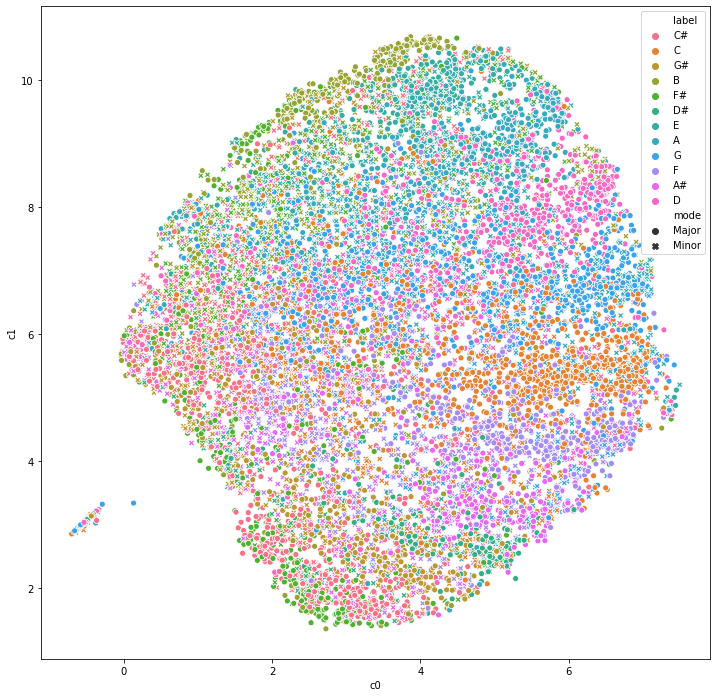

<IPython.core.display.Javascript object>

In [67]:
umap_df["label"] = df["key"]
umap_df["mode"] = df["mode"]
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", hue="label", data=umap_df, style="mode")

In [131]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(std_X), columns=["c0", "c1"])

<IPython.core.display.Javascript object>

In [134]:
pca.explained_variance_ratio_

array([0.16181417, 0.08275022])

<IPython.core.display.Javascript object>

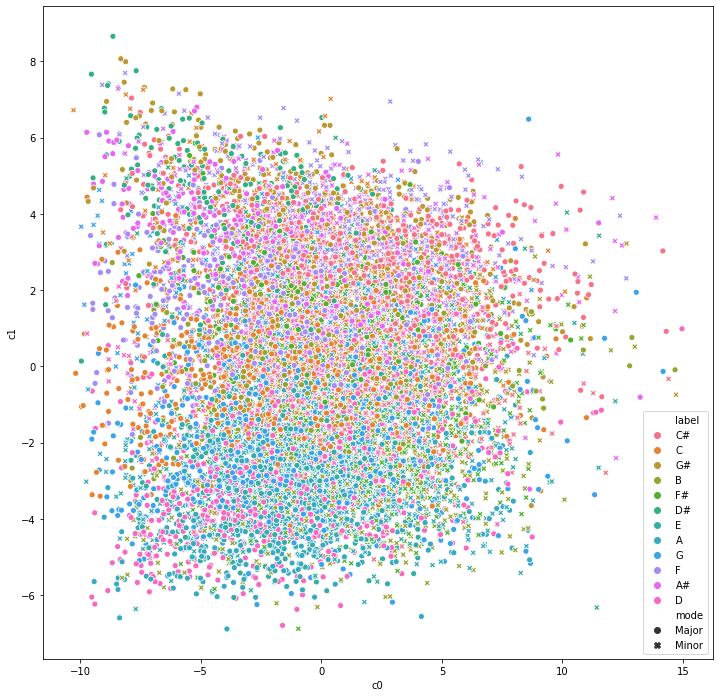

<IPython.core.display.Javascript object>

In [133]:
pca_df["label"] = df["key"]
pca_df["mode"] = df["mode"]
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", hue="label", data=pca_df, style="mode")

In [68]:
desc_cols = [
    "artist",
    "title",
    "popularity",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "genres",
    "key",
    "mode",
]

<IPython.core.display.Javascript object>

In [69]:
px_num = df[desc_cols].select_dtypes("number")
px_cat = df[desc_cols].select_dtypes("O")

<IPython.core.display.Javascript object>

In [70]:
minmax_scaler = MinMaxScaler()
scaled_num = pd.DataFrame(minmax_scaler.fit_transform(px_num), columns=px_num.columns)

<IPython.core.display.Javascript object>

In [71]:
px_df = pd.concat([scaled_num, px_cat], 1)
px_df = px_df.round(1)
px_df["x1"] = umap_df["c0"]
px_df["x2"] = umap_df["c1"]

<IPython.core.display.Javascript object>

In [129]:
X = umap_df[["c0", "c1"]]

clst = DBSCAN(eps=0.15, min_samples=40)
clst.fit(X)

px_df["clst_label"] = clst.labels_

<IPython.core.display.Javascript object>

In [130]:
px_df["clst_label"].value_counts()

-1     10730
 4       160
 2       142
 1       134
 3       115
 11      113
 12      109
 6        97
 14       92
 18       81
 21       80
 0        76
 19       75
 8        73
 22       70
 10       70
 15       67
 13       67
 27       66
 9        62
 7        59
 5        58
 16       53
 17       53
 23       49
 26       49
 29       45
 24       40
 30       40
 20       40
 31       40
 25       38
 28       28
Name: clst_label, dtype: int64

<IPython.core.display.Javascript object>

In [126]:
df["genres"].value_counts()[:50]

k-pop, k-pop boy group                                                                                  94
asmr                                                                                                    58
k-pop                                                                                                   56
contemporary country, country pop                                                                       47
desi pop, filmi, modern bollywood, sufi                                                                 44
chill out                                                                                               42
dance pop, pop, post-teen pop                                                                           41
contemporary country, country, country road                                                             39
background piano                                                                                        39
"children's story"                   

<IPython.core.display.Javascript object>

In [135]:


# Remove DBSCAN's outlier cluster
plot_df = px_df[px_df["clst_label"] != -1].copy()

# Make cluster label a string so plotly colors like categorical rather than continuous
plot_df["clst_label"] = "'" + plot_df["clst_label"].astype(str) + "'"



fig = px.scatter(
    data_frame=plot_df,
    x="x1",
    y="x2",
    color="clst_label",
    hover_data=['key','mode', 'genres']
)

fig.update_layout(showlegend=False)
fig.show()


<IPython.core.display.Javascript object>

In [136]:
x_range = [math.floor(plot_df["x1"].min()), math.ceil(plot_df["x1"].max())]
y_range = [math.floor(plot_df["x2"].min()), math.ceil(plot_df["x2"].max())]

<IPython.core.display.Javascript object>

In [138]:
#int_plot_df = plot_df.copy()
@interact(
    key = pitches,
    mode = ['Major', 'Minor']
    
)
def song_plot(key='C', mode='Major'):
    int_plot_df = plot_df.copy()
    int_plot_df = int_plot_df[int_plot_df['key']==key]
    int_plot_df = int_plot_df[int_plot_df['mode']==mode]
    fig = px.scatter(
        data_frame=int_plot_df,
        x="x1",
        y="x2",
        color="clst_label",
        hover_data=['key','mode'],
        range_x = x_range,
        range_y=y_range
    )

#     fig.update_layout(showlegend=False)
    fig.show()


interactive(children=(Dropdown(description='key', options=('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A…

<IPython.core.display.Javascript object>